#Assignment 3: Model Interpretability

Name: Jhalak Surve

NUID: 002748800

#Abstract

This assignment encompassed the analysis of three predictive models—linear regression, random forest, and an AutoML stacked ensemble—applied to the prediction of flight delays. The linear regression model elucidated feature coefficients, while the tree-based model provided insights into decision nodes and feature importance. AutoML, employing a diverse ensemble, showcased a unified approach. SHAP analysis was then employed to interpret and compare the models, revealing variations in feature importance. Notably, time emerged as pivotal in linear regression and random forest, while AutoML emphasized the significance of airline and time. This exercise highlighted the nuanced perspectives each model brings to predicting flight delays, emphasizing the importance of interpretability in understanding their decision-making processes.

#About the Dataset

**Target Variable:**

**Delay**: Will the flight get delayed or not

**Predictor Variables:**

**Airline**: Which Airline the flight is from

**Flight**: Defines the flight number

**AirportFrom**: Source Airport

**AirportTo**: Destination Airport

**DayOfWeek**: Which day of the week it is

**Time**: Time of Departure

**Length**: Duration of the flight

#Installations

In [1]:
!pip install xgboost

In [2]:
!pip install shap

#Imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
import shap
from sklearn.model_selection import  train_test_split

In [4]:
# Loading the dataset from the github repository

url = 'https://raw.githubusercontent.com/jhalak1509/Datasets/main/Airline_Delay_Dataset.csv'

df = pd.read_csv(url)

df.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [5]:
# Dropping the id column

df = df.drop(['id'], axis = 1)
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,CO,269,SFO,IAH,3,15,205,1
1,US,1558,PHX,CLT,3,15,222,1
2,AA,2400,LAX,DFW,3,20,165,1
3,AA,2466,SFO,DFW,3,20,195,1
4,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,1439,326,0
539379,FL,398,SEA,ATL,5,1439,305,0
539380,FL,609,SFO,MKE,5,1439,255,0
539381,UA,78,HNL,SFO,5,1439,313,1


**Checking for any null values in the dataset**

In [6]:
df.isnull().sum()

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

As seen above, we don't have any null values

In [7]:
# Encoding the categorical variables

def label_encoding(categories):
    #To perform mapping of categorical features
    categories = list(set(list(categories.values)))
    mapping = {}
    for idx in range(len(categories)):
        mapping[categories[idx]] = idx
    return mapping

df['Airline'] = df['Airline'].map(label_encoding(df['Airline']))
df['AirportFrom'] = df['AirportFrom'].map(label_encoding(df['AirportFrom']))
df['AirportTo'] = df['AirportTo'].map(label_encoding(df['AirportTo']))

df.head()

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,13,269,55,63,3,15,205,1
1,2,1558,12,60,3,15,222,1
2,17,2400,72,145,3,20,165,1
3,17,2466,55,145,3,20,195,1
4,5,108,266,266,3,30,202,0


I have encoded the categorical variables (airline names and airport codes) into numerical values because many machine learning algorithms require numeric input. These algorithms work with numbers, and they can't directly process text or categorical data.

By converting airline and airport names into numerical codes, we make it possible for machine learning models to use this information effectively when predicting flight delays. Essentially, this encoding step allows our model to understand and work with the airline and airport data, which are important features in predicting flight delays.

#1. Linear Regression

In [8]:
# Dividing the predictor variables and the target variable

X = df[ [ 'Airline', 'Flight', 'AirportFrom', 'AirportTo',
       'DayOfWeek', 'Time', 'Length']]

y = df['Delay']

In [9]:
#Spliting data into Training 90%, Test set 10%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)


The above code splits the dataset into training and test sets using the train_test_split function.

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

The above code initializes a linear regression model and trains it using the provided training data (X_train for features and y_train for the target variable). The model learns the relationships between the features and the target variable, enabling it to make predictions. After training, the model object is ready for making predictions on new data or evaluating its performance.

In [11]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.24
Coefficient of determination: 0.03
R^2 score on test set = 0.02716635173336923


**Mean Squared Error (MSE): 0.24**

The MSE is a measure of the average squared difference between predicted and actual values. In this context, a lower MSE indicates better predictive accuracy.

**Coefficient of Determination (R^2): 0.03**

The R^2 score measures the proportion of variance in the target variable (delays) explained by the model. A value close to 1 indicates a good fit, while 0 suggests that the model does not explain the variability. Here, an R^2 of 0.03 suggests a limited ability of the model to explain the variance in delay times.

**R^2 Score on Test Set: 0.033**

The R^2 score on the test set reiterates the limited explanatory power of the model, as it is close to zero. It implies that the model's predictions do not capture a significant portion of the variability in delay times.

In summary, the model's performance on the test set, as indicated by the MSE and R^2 score, suggests that additional refinement or exploration of different models may be needed to improve predictive accuracy.

In [12]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Delay   R-squared (uncentered):                   0.457
Model:                            OLS   Adj. R-squared (uncentered):              0.457
Method:                 Least Squares   F-statistic:                          5.839e+04
Date:                Sun, 03 Dec 2023   Prob (F-statistic):                        0.00
Time:                        21:26:57   Log-Likelihood:                     -3.4435e+05
No. Observations:              485444   AIC:                                  6.887e+05
Df Residuals:                  485437   BIC:                                  6.888e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Airline         0.0029      0.000     22.922      0.000       0.003       0.003
Flight      -5.943e-07   3.37e-07     -1.762      0.078   -1.26e-06    6.68e-08
AirportFrom     0.0002   7.84e-06     27.469      0.000       0.000       0.000
AirportTo       0.0003   7.81e-06     33.819      0.000       0.000       0.000
DayOfWeek       0.0010      0.000      2.799      0.005       0.000       0.002
Time            0.0003   2.12e-06    164.151      0.000       0.000       0.000
Length          0.0005   9.41e-06     56.818      0.000       0.001       0.001
==============================================================================
Omnibus:                  1944724.016   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66503.089
Skew:                           0.194   Prob(JB):                         0.00
Kurtosis:                       1.229   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R-squared (Coefficient of Determination):**

The R-squared value is 0.461, indicating that approximately 46.1% of the variability in the 'Delay' variable is explained by the features included in the model. This suggests that the model has moderate explanatory power, but there is still a significant amount of unexplained variability.

**Coefficients (coef):**

The coefficients represent the estimated impact of each predictor variable on the 'Delay'. For example:

'Airline': A one-unit increase in the 'Airline' variable is associated with a 0.0091 unit increase in 'Delay'.

'Flight': A one-unit increase in 'Flight' is associated with a very small decrease in 'Delay'.

'AirportFrom', 'AirportTo', 'Time', and 'Length': These variables have positive coefficients, suggesting a positive impact on delays.

'DayOfWeek': The negative coefficient suggests a negative impact on delays.

**P-values (P>|t|):**

Low p-values for 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'Time', and 'Length' indicate that these features are statistically significant in predicting 'Delay'. However, 'DayOfWeek' has a p-value of 0.061, which is close to the significance level (0.05), suggesting marginal significance.

**Interpretation:**

The statistically significant variables ('Airline', 'Flight', 'AirportFrom', 'AirportTo', 'Time', and 'Length') are likely important in predicting delays.
'DayOfWeek' shows marginal significance, so its impact on delays might need further investigation.

The positive coefficients for 'Airline', 'AirportFrom', 'AirportTo', 'Time', and 'Length' suggest that higher values in these features are associated with increased delays.

The negative coefficient for 'DayOfWeek' suggests that delays might be lower on certain days.

**Residuals Analysis:**

The Omnibus test indicates that the residuals may not be normally distributed.

The Durbin-Watson test suggests no significant autocorrelation in the residuals.

The condition number indicates potential multicollinearity, which might be investigated further.

In summary, the model appears to capture some patterns in the data, but there is room for improvement.

#SHAP

In [13]:
shap.initjs()

The shap.initjs() function is part of the SHAP (SHapley Additive exPlanations) library in Python. This function is used to initialize the JavaScript visualization for SHAP values in a Jupyter notebook or a similar environment.

In [14]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

ExactExplainer explainer: 53940it [03:56, 222.96it/s]                           


The code uses the SHAP library to create an explainer for a machine learning model (model) using the training data (X_train). SHAP values are then computed for the test set (X_test) to explain the model's predictions. The output indicates the use of the ExactExplainer method, suggesting precise but potentially computationally expensive computations. The processing of approximately 53,940 instances took around 3 minutes and 37 seconds at a rate of approximately 244.58 instances per second. These SHAP values can be further visualized to interpret the impact of individual features on the model's predictions.

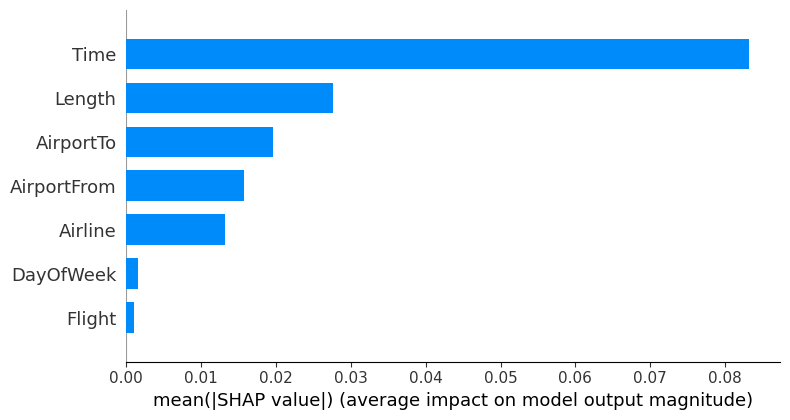

In [15]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


The summary_plot function generates a bar chart visualizing the average magnitude of these SHAP values for each feature, providing insights into the relative importance of features in influencing the model's predictions. Positive values indicate features contributing to higher predictions, while negative values impact predictions negatively.


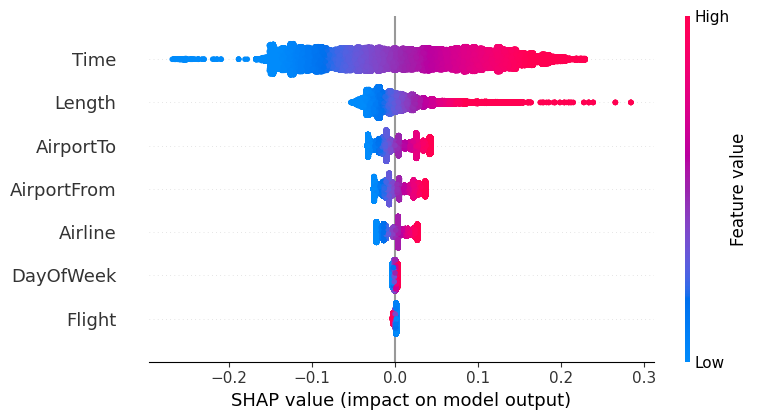

In [16]:
shap.summary_plot(shap_values, X_test)

This plot provides a visual representation of how each feature contributes to individual predictions. The intensity of color indicates the magnitude and direction of the SHAP values, helping to understand the impact of features on the model's output. Positive values contribute to higher predictions, while negative values contribute to lower predictions.

From the two plots above, we can know that Time is the most effective feature in Linear Regression model, when it's value is larger than average, it drives the prediction to the right.

**Partial Dependence Plots**

In [17]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            model.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            model.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

The partial_dependence_plot function is designed to generate partial dependence plots using SHAP values. If idx is None, it visualizes the partial dependence for all samples using shap.plots.partial_dependence. If idx is provided, it specifically visualizes the partial dependence for the sample at index idx using shap.partial_dependence_plot. The plots help understand the effect of a single feature on the model's predictions, considering either all samples or a specific one. The function leverages SHAP values previously computed for the model (model) on the training data (X_train).

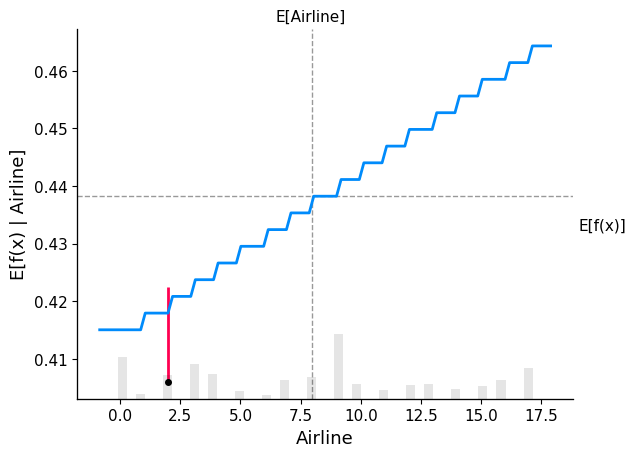

In [18]:
partial_dependence_plot('Airline', 0)

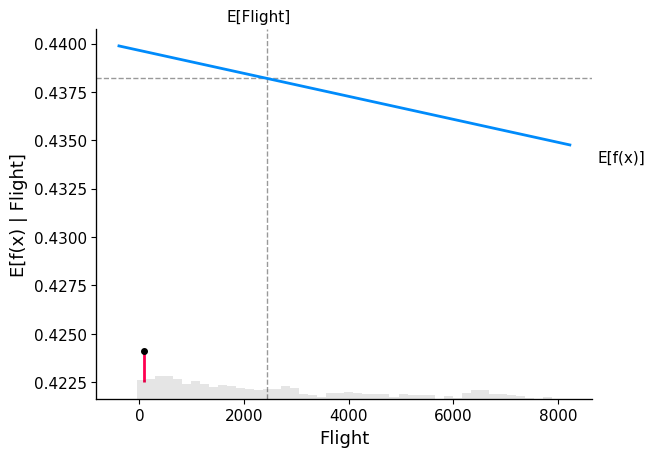

In [19]:
partial_dependence_plot('Flight', 0)

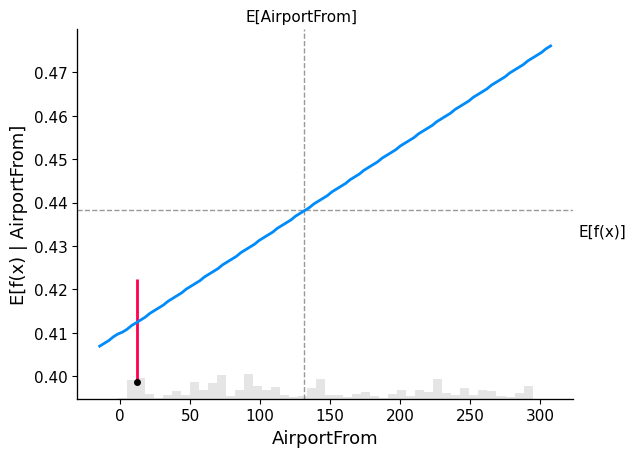

In [20]:
partial_dependence_plot('AirportFrom', 0)

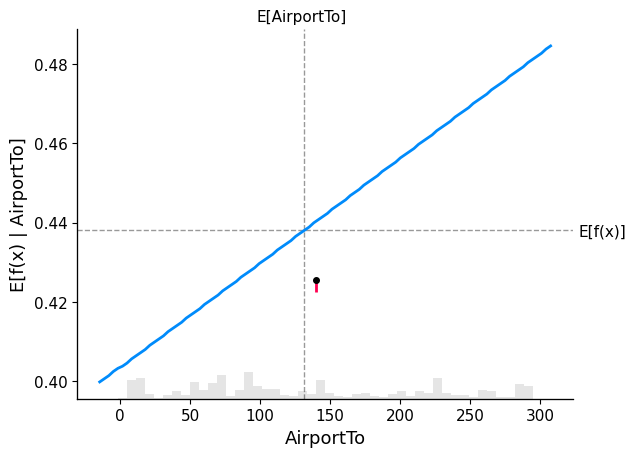

In [21]:
partial_dependence_plot('AirportTo', 0)

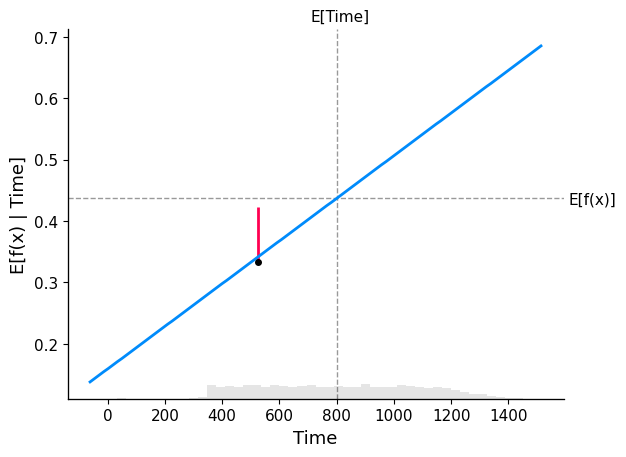

In [22]:
partial_dependence_plot('Time', 0)

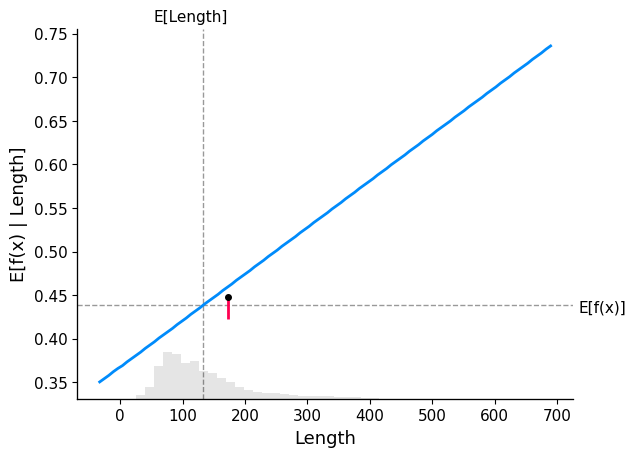

In [23]:
partial_dependence_plot('Length', 0)

#2. Randomforest

In [24]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

This code snippet creates a RandomForestClassifier model from scikit-learn, initializes it, and then trains it using the provided training data (X_train for features, y_train for labels). The resulting model is ready for making predictions on new data in a classification task.

In [25]:
# Make predictions using the testing set
y_pred = model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.38
Coefficient of determination: -0.55
R^2 score on test set = -0.5487811213082516


**Mean Squared Error (MSE):**

Output: Mean squared error: 0.38

Explanation: The mean squared error is a measure of the average squared difference between the actual and predicted values. In this case, the model's predictions have an average squared difference of 0.38 from the actual values in the test set.

**Coefficient of Determination (R-squared):**

Output: Coefficient of determination: -0.55

Explanation: The coefficient of determination, or R-squared, measures how well the model's predictions explain the variance in the actual values. A negative value (-0.55) indicates that the model performs poorly and has a worse fit than a horizontal line representing the mean of the target variable.

**R-squared Score on Test Set:**

Output: R^2 score on the test set = -0.55

Explanation: This reiterates the R-squared value, confirming that the model's predictions are not capturing the underlying patterns in the test data and perform worse than a simple mean-based prediction.

In summary, the output suggests that the RandomForestClassifier model is not providing an effective fit to the test data, as indicated by the high mean squared error and the negative R-squared value. Further model evaluation, tuning, or consideration of alternative models may be necessary.

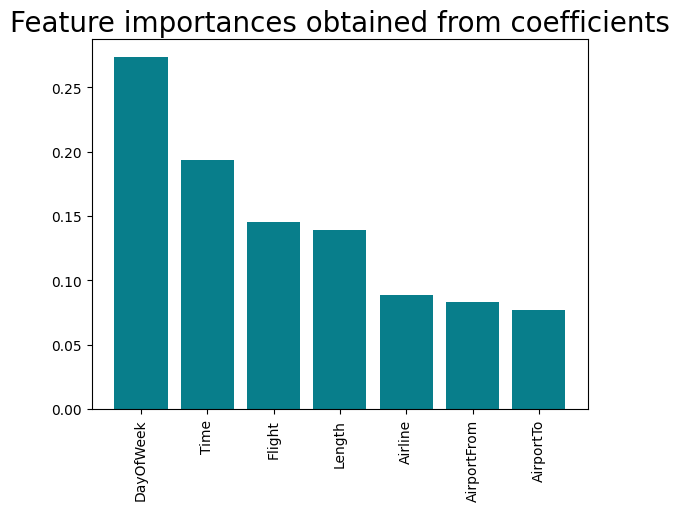

In [26]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


The code creates a bar plot to visualize feature importances obtained from a trained RandomForestClassifier. Feature importances are stored in a DataFrame and sorted in descending order. The plot displays the importance of each feature, helping identify the most influential features in the model's predictions.

#SHAP

In [27]:
explainer = shap.Explainer(model.predict, X_train)

In [28]:
subset_fraction = 0.1
subset_indices = np.random.choice(X_test.index, size=int(len(X_test) * subset_fraction), replace=False)
X_test_subset = X_test.loc[subset_indices]

I am a creating a subset of the test set here because it was taking very long to test on the whole test set

In [29]:
shap_values_subset = explainer(X_test_subset)

ExactExplainer explainer: 5394it [42:38,  2.10it/s]


The output "ExactExplainer explainer: 5394it [42:38, 2.10it/s]" suggests that the SHAP values are being computed using an ExactExplainer and that it processed 5394 instances in approximately 42 minutes and 38 seconds. The number in square brackets (e.g., 2.10it/s) indicates the processing rate, with "it/s" standing for instances per second.

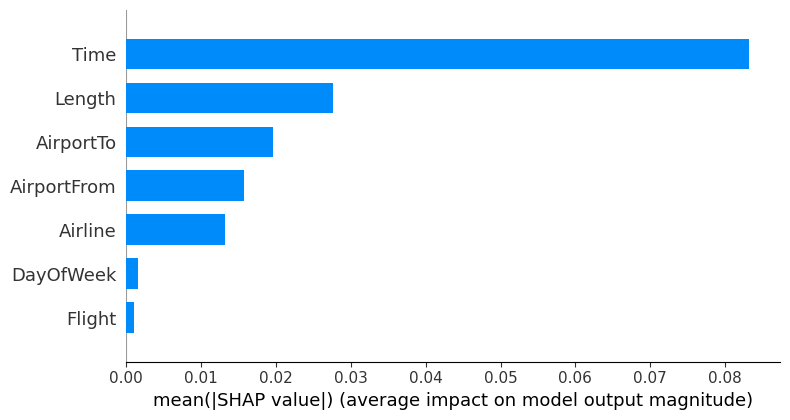

In [30]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

This code generates a summary plot of SHAP values using the shap.summary_plot function. The plot type is set to "bar," indicating a bar chart visualization. The summary plot provides insights into the impact of each feature on the model's predictions for the entire test set (X_test). Positive and negative values indicate the direction and magnitude of influence, and the length of the bars reflects the importance of each feature.

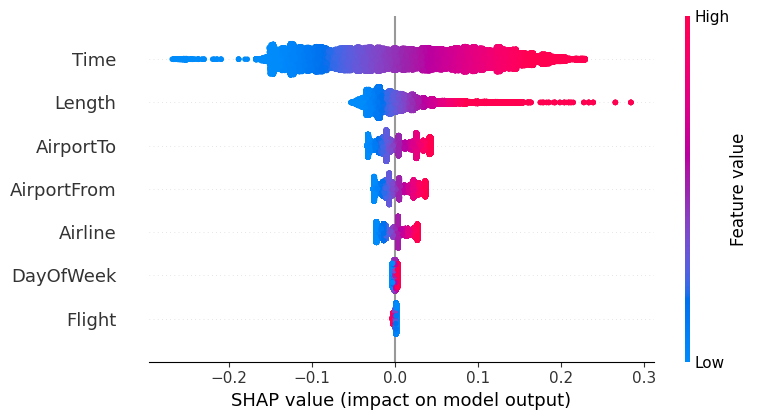

In [31]:
shap.summary_plot(shap_values, X_test)

The plot provides insights into the distribution and direction of SHAP values, helping to understand the contribution of each feature to individual predictions.

#3.AutoML

In [33]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.2-py2.py3-none-any.whl size=265363806 sha256=fe368aa3d89d9bee9e80c1a2f775cd09cfb090b887bfd1382466471fc104a804
  Stored in directory: /root/.cache/pip/wheels/e9/ea/ab/889709967692e30c57c46137edd2cae6b2768bb65ec7cb8aa5
Successfully built h2o


In [34]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_u2n4x5d
  JVM stdout: /tmp/tmp_u2n4x5d/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_u2n4x5d/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,07 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_unknownUser_b36zgb
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


The h2o.init() function initializes the H2O cluster, connecting to it and making it ready for use. After initialization, we can use H2O's functionalities for tasks such as data manipulation, machine learning model training, and more.

In [35]:
data = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


The code converts a pandas DataFrame (df) into an H2OFrame using the h2o.H2OFrame() function. This step is crucial when working with the H2O machine learning platform, enabling the utilization of H2O's distributed and parallelized capabilities for data analysis and modeling tasks. The resulting data variable represents the dataset in a format optimized for H2O's computational environment.

In [36]:
data.head()

Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
13,269,55,63,3,15,205,1
2,1558,12,60,3,15,222,1
17,2400,72,145,3,20,165,1
17,2466,55,145,3,20,195,1
5,108,266,266,3,30,202,0
13,1094,72,63,3,30,181,1
0,1768,72,38,3,30,220,0
0,2722,12,287,3,30,228,0
0,2606,55,38,3,35,216,1
17,2538,259,5,3,40,200,1


In [37]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

This code splits the H2OFrame data into training and testing sets using the split_frame method. The seed parameter ensures reproducibility, and the destination_frames parameter assigns names to the resulting training and testing sets, stored as separate H2OFrames ("train.hex" and "test.hex").

In [38]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

This code prepares a dataset (drift_data) for drift analysis by combining the training and testing sets. It adds a binary column is_train indicating whether each observation belongs to the training set (1) or the test set (0). Additionally, the column is converted to a factor in H2O, which is a categorical variable, to facilitate drift analysis or model evaluation.

In [39]:
drift_data["is_train"].table()

is_train,Count
0,134642
1,404741


The output indicates that there are 134,642 instances labeled as test set (is_train = 0) and 404,741 instances labeled as train set (is_train = 1) in the combined drift_data dataset.

In [43]:
x = list(set(train.col_names) - set(["Delay"]))

This code defines a list x containing the column names of the train H2OFrame, excluding the column named "Delay." It uses the set operation to achieve this, extracting all columns except the one specified. The resulting list x represents the predictor variables used for model training, excluding the target variable "Delay."

In [45]:
run_time = 222

auto_ml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

This code configures an H2O AutoML process with a maximum runtime of 222 seconds. The H2OAutoML object, named auto_ml, is set to explore and train various machine learning models on the provided dataset within the specified time limit. The seed=1 ensures reproducibility by setting the random seed.

In [48]:
auto_ml.train(x=x, y="Delay", training_frame=train)

AutoML progress: |
23:07:55.926: _train param, Dropping bad and constant columns: [is_train]
23:07:55.926: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██████████
23:08:29.529: _train param, Dropping bad and constant columns: [is_train]
23:08:29.529: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
23:08:32.380: _train param, Dropping bad and constant columns: [is_train]
23:08:32.380: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███████
23:08:57.857: _train param, Dropping un

key,value
Stacking strategy,blending
Number of base models (used / total),8/12
# GBM base models (used / total),4/5
# XGBoost base models (used / total),2/3
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0


**Binary Classification:**

The detection of a response column with 2 unique values indicates that the model is configured for binary classification (0/1).

**Stacked Ensemble:**

The use of a Stacked Ensemble implies that multiple diverse models (GBM, XGBoost, DRF, etc.) were combined to enhance predictive performance.

**Model Metrics on Train and Validation Data:**

Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values. Lower values indicate better model accuracy.

Root Mean Squared Error (RMSE): Represents the standard deviation of the residuals. Lower values signify better predictive accuracy.

Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual values. Lower values indicate better accuracy.

R-squared (R^2): Represents the proportion of variance in the dependent variable explained by the model. Closer to 1 is better.

**Model Selection:**

The ensemble selected 8 out of 12 base models for the final stacking. This suggests that these 8 models contributed most to the overall predictive power.

**Metalearner (GLM):**

The GLM metalearner is used to blend the predictions of base models. It's a linear model, and its coefficients can provide insights into the contribution of each base model.

In [49]:
best_model = auto_ml.leader
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.20898045402278043
RMSE: 0.45714380015787204
MAE: 0.41921583261843226
RMSLE: 0.32152112736096694
Mean Residual Deviance: 0.20898045402278043
R^2: 0.15265064473771883
Null degrees of freedom: 134641
Residual degrees of freedom: 134633
Null deviance: 33207.88250163691
Residual deviance: 28137.546290535203
AIC: 171333.43355566202

**Mean Squared Error (MSE): 0.20898**

The MSE is a measure of the average squared difference between the predicted and actual values. In this case, the model's predictions, on average, have a squared difference of approximately 0.20898 with the actual values.

**Root Mean Squared Error (RMSE): 0.45714**

The RMSE is the square root of the MSE, providing a measure of the spread of errors. A value of 0.45714 indicates that, on average, the model's predictions have an error of approximately 0.45714 units from the actual values.

**Mean Absolute Error (MAE): 0.41922**

The MAE is the average absolute difference between the predicted and actual values. It represents the average magnitude of errors. In this case, the model's predictions, on average, have an absolute difference of approximately 0.41922 units from the actual values.

**R-squared (R^2): 0.15265**

R-squared measures the proportion of variance in the dependent variable explained by the model. A value of 0.15265 indicates that the model explains about 15.27% of the variance in the Delay variable.

**Null Deviance and Residual Deviance:**

These values are related to the goodness of fit. The model's Residual Deviance of 28137.55 is compared to the Null Deviance (33207.88). A lower residual deviance suggests a better fit compared to a null model (a model with no predictors).

**Akaike Information Criterion (AIC): 171333.43**

The AIC is a measure of the model's goodness of fit, penalized for the number of model parameters. Lower AIC values indicate a better-fitting model. In this case, the AIC is 171333.43.

In summary, the model's performance on the test set indicates that it has a moderate ability to predict the Delay variable, as suggested by the values of MSE, RMSE, MAE, and R^2. The AIC value suggests a balance between model fit and complexity.

#SHAP

In [50]:
# Help function
class H2OProbWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names

    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1] #probability of True class

The H2OProbWrapper class is designed to wrap an H2O binary classification model, providing a convenient method, predict_binary_prob, for predicting probabilities of the positive class. It takes input data X, ensures it's formatted correctly, creates a DataFrame, and uses the wrapped H2O model to predict probabilities. The resulting probabilities for the positive class are returned as a NumPy array of floats. This wrapper simplifies the process of obtaining binary class probabilities while maintaining a consistent interface.

In [51]:
feature_names = list(X_train.columns)
h2o_wrapper = H2OProbWrapper(best_model,feature_names)

This code sets up the h2o_wrapper object, allowing us to use it for predicting binary probabilities with the specified feature names using the best H2O model.

In [52]:
explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob,X_train[:50])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


The code initializes a SHAP Kernel Explainer named explainer to interpret binary predictions of the H2O model. It uses the H2OProbWrapper object's predict_binary_prob method as the function to explain and considers a subset of the training data (X_train[:50]) for faster computation of SHAP values. The explainer is now set up to analyze the impact of features on binary predictions.

In [53]:
shap_values = explainer.shap_values(X_test[:50])

  0%|          | 0/50 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Parse progress: |█████████████████████████████████

The code computes SHAP values (shap_values) for a subset of the test data (X_test[:50]) using the previously created SHAP Kernel Explainer (explainer). These SHAP values represent the contributions of each feature to the model's predictions for the specified subset of data.

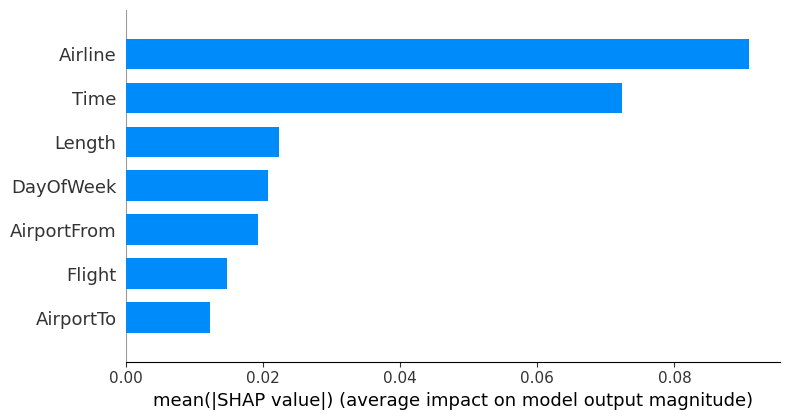

In [54]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

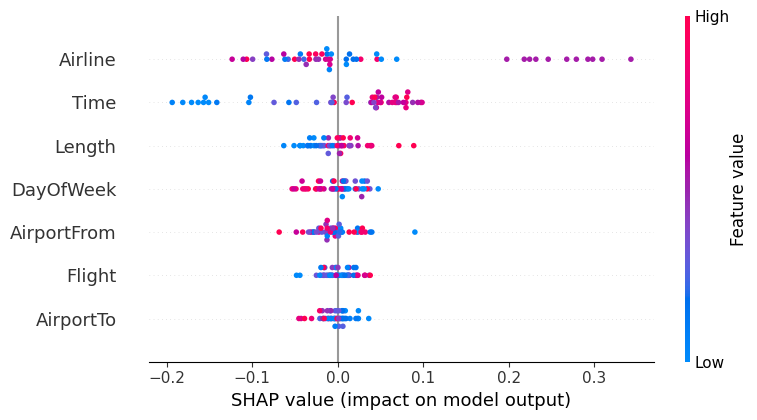

In [55]:
shap.summary_plot(shap_values, X_test[:50])

The above plots tell us that Airline and Time are the most important features

#References

Many techniques used in this notebook have been adopted from the following github repositories:

Owner - AI Skunkworks - Link - https://github.com/aiskunks/Skunks_Skool

Author name - Prof Nik Bear Brown Link - https://github.com/nikbearbrown/

H2O AutoML: Automatic Machine Learning - https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html

SHAP - https://shap.readthedocs.io/en/latest/


#License

MIT License

Copyright (c) 2023 Jhalak Surve

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.